In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df= pd.read_csv('MSFT.csv')

In [5]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061351,47894400


In [6]:
df.shape

(9295, 7)

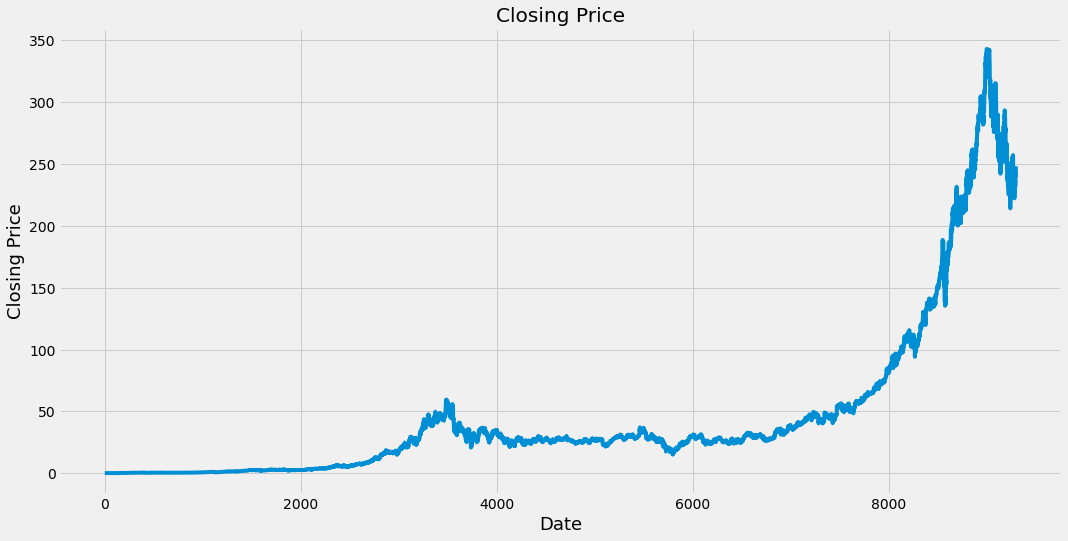

In [8]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()

In [16]:
#Taking close column
data=df.filter(['Close'])

#Convert dataframe in numpy array
dataset = data.values

#Geting no of rows for training data set

training_data_len=math.ceil(len(dataset)*.8)
training_data_len


7436

In [19]:
#Scaling the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)
scaled_data

array([[2.02437349e-05],
       [3.03656023e-05],
       [3.54294513e-05],
       ...,
       [7.01183396e-01],
       [7.22727345e-01],
       [7.23193802e-01]])

In [23]:
#Creating training dataset
#Creating scaled training dataset

train_data=scaled_data[0:training_data_len,:]

#Split into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()


[array([2.02437349e-05, 3.03656023e-05, 3.54294513e-05, 2.78351354e-05,
       2.27742017e-05, 1.51828011e-05, 7.59140057e-06, 0.00000000e+00,
       5.06093371e-06, 1.26523343e-05, 1.77132680e-05, 1.51828011e-05,
       1.26523343e-05, 1.51828011e-05, 1.77132680e-05, 1.77132680e-05,
       1.26523343e-05, 1.51828011e-05, 2.02437349e-05, 2.27742017e-05,
       2.78351354e-05, 3.03656023e-05, 3.03656023e-05, 4.04903850e-05,
       4.30208519e-05, 3.28989844e-05, 3.28989844e-05, 2.78351354e-05,
       2.91003689e-05, 5.82036530e-05, 7.84503031e-05, 8.09807700e-05,
       7.08559873e-05, 6.32645867e-05, 5.82036530e-05, 5.82036530e-05,
       5.56731861e-05, 5.82036530e-05, 5.82036530e-05, 6.07341199e-05,
       5.82036530e-05, 6.07341199e-05, 6.32645867e-05, 6.07341199e-05,
       6.07341199e-05, 6.32645867e-05, 5.82036530e-05, 5.56731861e-05,
       5.06122524e-05, 5.06122524e-05, 5.06122524e-05, 6.07341199e-05,
       7.08559873e-05, 7.84503031e-05, 9.11026374e-05, 8.09807700e-05,
     

In [24]:
#Converting X_train and Y_train to numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [27]:
#Reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(7376, 60, 1)

In [29]:
#Bulding a model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
#Complile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [31]:
#Training the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

7376/7376 [==============================] - 206s 27ms/step - loss: 2.8889e-05


In [38]:
#Creating testing data set
test_data=scaled_data[training_data_len-60:,:]
#Creating data set for x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [39]:
#Convert to numpy array
x_test=np.array(x_test)

In [40]:
#Reshape data
x_test=np.reshape(x_test,(x_test.shape[0],x_train.shape[1],1))

In [41]:
#Get the prediction
prediction=model.predict(x_test)
#Inverse scalar tranfor
prediction=scalar.inverse_transform(prediction)

59/59 [==============================] - 1s 18ms/step


In [42]:
#Geting root mean squared error
rsme=np.sqrt(np.mean(prediction-y_test)**2)
rsme

0.9761017184166874

<ipython-input-50-580a48ce1e63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=prediction


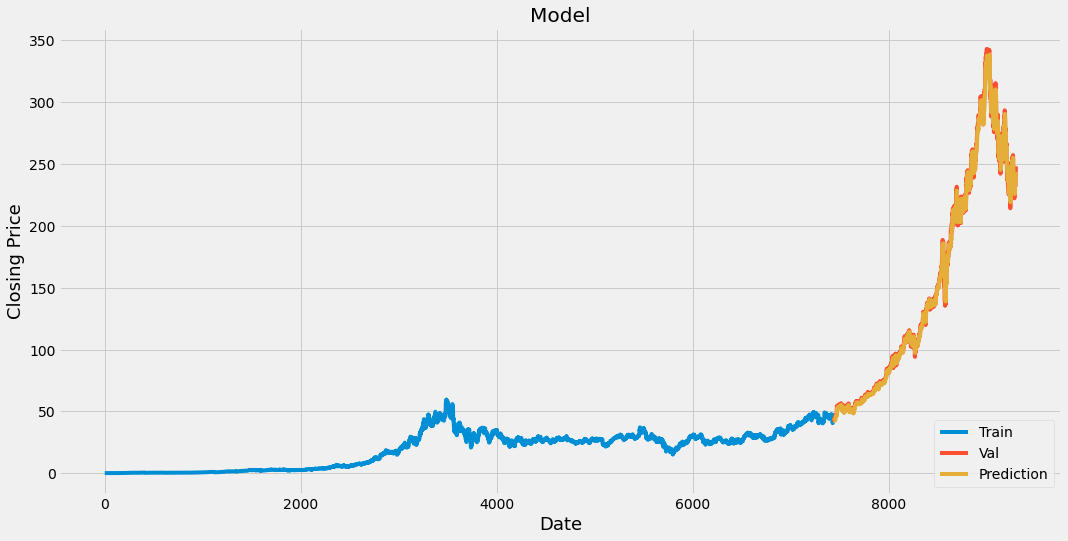

In [50]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=prediction

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.savefig('pred')



In [44]:
#Saving the model
model.save("LSTM.h5")


In [47]:
#Show the vaild vs predicted
valid

,Close,Prediction
7436,43.290001,42.468765
7437,43.480000,42.442013
7438,43.040001,42.495087
7439,43.980000,42.376011
7440,44.299999,42.614277
...,...,...
9290,242.580002,236.580978
9291,242.039993,239.132141
9292,240.610001,240.669342
9293,248.000000,240.753433
